# Problem 1

## Imports

In [1]:
import os
import random
import seaborn
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.initializers import Constant
from keras_preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, GRU

## Constants

In [2]:
RANDOM_SEED = 69
NUMBER_OF_EPOCHS = 10
BATCH_SIZE = 60
NUMBER_OF_WORKERS = 8
NUMBER_OF_NODES = 32

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

## Get spam data from https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

In [25]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.rename(columns={'v1': 'Classification', 'v2': 'SMS'}, inplace=True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df['num_of_words'] = df['SMS'].str.count(' ') + 1
max_length = int(df['num_of_words'].max())
df.head()

,Classification,SMS,num_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


## Function to preprocess the data

In [4]:
def preprocess(sms, label, tokenizer, label_encoder):
    sequences = tokenizer.texts_to_sequences(sms)
    classification = label_encoder.fit_transform(label)
    x = pad_sequences(sequences, maxlen=max_length)
    y = np.asarray(classification)
    return x, y

## Preprocess the data

In [5]:
sms_train, sms_test, label_train, label_test = train_test_split(df['SMS'].to_numpy(), df['Classification'].to_numpy(), test_size = 0.3, random_state = RANDOM_SEED)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sms_train)
label_encoder = preprocessing.LabelEncoder()
word_index = tokenizer.word_index
number_of_tokens = len(word_index) + 1

x_train, y_train = preprocess(sms_train, label_train, tokenizer, label_encoder)
x_test, y_test = preprocess(sms_test, label_test, tokenizer, label_encoder)

## Function to build model

In [6]:
def build_model(rnn_layer, embedding_layer, x_train, y_train):
    model = Sequential()
    model.add(embedding_layer)
    model.add(rnn_layer)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=NUMBER_OF_EPOCHS, batch_size=BATCH_SIZE, workers=NUMBER_OF_WORKERS)
    return model, history

def prediction_report(model, x, y):
    prediction = model.predict(x)
    prediction_bool = np.where(prediction >= 0.5, 1 ,0 )
    print(classification_report(y, prediction_bool, target_names=['Ham', 'Spam']))
    return prediction_bool

## Build vanilla RNN network and get precision and recall

In [7]:
rnn_model, rnn_history = build_model(SimpleRNN(NUMBER_OF_NODES), Embedding(number_of_tokens, NUMBER_OF_NODES), x_train, y_train)
rnn_prediction = prediction_report(rnn_model, x_test, y_test)

Epoch 1/10


2022-10-09 23:34:02.772235: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


65/65 [==============================] - 1s 13ms/step - loss: 0.2509 - acc: 0.9254
Epoch 2/10
65/65 [==============================] - 1s 13ms/step - loss: 0.0742 - acc: 0.9818
Epoch 3/10
65/65 [==============================] - 1s 13ms/step - loss: 0.0433 - acc: 0.9885
Epoch 4/10
65/65 [==============================] - 1s 12ms/step - loss: 0.0331 - acc: 0.9879
Epoch 5/10
65/65 [==============================] - 1s 12ms/step - loss: 0.0302 - acc: 0.9905
Epoch 6/10
65/65 [==============================] - 1s 12ms/step - loss: 0.0111 - acc: 0.9969
Epoch 7/10
65/65 [==============================] - 1s 12ms/step - loss: 0.0169 - acc: 0.9949
Epoch 8/10
65/65 [==============================] - 1s 13ms/step - loss: 0.0077 - acc: 0.9979
Epoch 9/10
65/65 [==============================] - 1s 13ms/step - loss: 0.0046 - acc: 0.9987
Epoch 10/10
53/53 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99  

## Build LSTM network and get precision and recall

In [8]:
lstm_model, lstm_history = build_model(LSTM(NUMBER_OF_NODES), Embedding(number_of_tokens, NUMBER_OF_NODES), x_train, y_train)
lstm_prediction = prediction_report(lstm_model, x_test, y_test)

Epoch 1/10
65/65 [==============================] - 2s 27ms/step - loss: 0.2807 - acc: 0.9010
Epoch 2/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0901 - acc: 0.9823
Epoch 3/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0471 - acc: 0.9910
Epoch 4/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0293 - acc: 0.9946
Epoch 5/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0198 - acc: 0.9954
Epoch 6/10
65/65 [==============================] - 2s 27ms/step - loss: 0.0128 - acc: 0.9974
Epoch 7/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0090 - acc: 0.9985
Epoch 8/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0074 - acc: 0.9982
Epoch 9/10
65/65 [==============================] - 2s 26ms/step - loss: 0.0059 - acc: 0.9982
Epoch 10/10
53/53 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         Ham       0.98      1.00 

## Build GRU network and get precision and recall

In [9]:
gru_model, gru_history = build_model(GRU(NUMBER_OF_NODES), Embedding(number_of_tokens, NUMBER_OF_NODES), x_train, y_train)
gru_prediction = prediction_report(gru_model, x_test, y_test)

Epoch 1/10
65/65 [==============================] - 2s 24ms/step - loss: 0.2881 - acc: 0.8908
Epoch 2/10
65/65 [==============================] - 2s 24ms/step - loss: 0.0604 - acc: 0.9856
Epoch 3/10
65/65 [==============================] - 2s 24ms/step - loss: 0.0265 - acc: 0.9923
Epoch 4/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0171 - acc: 0.9962
Epoch 5/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0118 - acc: 0.9972
Epoch 6/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0078 - acc: 0.9979
Epoch 7/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0061 - acc: 0.9987
Epoch 8/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0048 - acc: 0.9987
Epoch 9/10
65/65 [==============================] - 2s 23ms/step - loss: 0.0031 - acc: 0.9990
Epoch 10/10
53/53 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         Ham       0.99      1.00 

## Split test dataset into short, medium and long strings

In [10]:
test_df = pd.DataFrame(list(sms_test))
test_df.rename(columns={0: 'SMS'}, inplace=True)
test_df['length']  = test_df['SMS'].str.len()
test_df['label'] = pd.DataFrame(list(label_test))
short_test = test_df[test_df['length'] <= test_df['length'].quantile(0.33)]
medium_test = test_df[(test_df['length'] > test_df['length'].quantile(0.33)) & (test_df['length'] <= test_df['length'].quantile(0.66))]
long_test = test_df[test_df['length'] > test_df['length'].quantile(0.66)]

## Predict using all three models on short, medium and long test datasets

In [11]:
for model in [("Simple RNN Model", rnn_model), ("LSTM Model", lstm_model), ("GRU Model", gru_model)]:
    for data in [("Short Messages", short_test), ("Medium Messages", medium_test), ("Long Messages", long_test)]:
        print("Classification report for", data[0], "with", model[0])
        x, y = preprocess(data[1]['SMS'], data[1]['label'], tokenizer, label_encoder)
        prediction_report(model[1], x, y)    

Classification report for Short Messages with Simple RNN Model
18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       560
        Spam       0.42      0.71      0.53         7

    accuracy                           0.98       567
   macro avg       0.71      0.85      0.76       567
weighted avg       0.99      0.98      0.99       567

Classification report for Medium Messages with Simple RNN Model
17/17 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       514
        Spam       0.80      0.73      0.76        22

    accuracy                           0.98       536
   macro avg       0.89      0.86      0.88       536
weighted avg       0.98      0.98      0.98       536

Classification report for Long Messages with Simple RNN Model
18/18 [==============================] - 0s 2ms/ste

# Question 2

## Glove embeddings from https://github.com/qizhex/Large-scale-Cloze-Test-Dataset-Created-by-Teachers/raw/master/embed/glove.6B.300d.txt

In [12]:
embedding_dim = 300

embeddings_index = {}
with open('glove.6B.300d.txt') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

glove_embeddings = np.zeros((number_of_tokens, embedding_dim))
for word, i in word_index.items():
    if i < number_of_tokens:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            glove_embeddings[i] = embedding_vector

## Train model and predict with glove embeddings

In [13]:
layer = Embedding(number_of_tokens, embedding_dim, embeddings_initializer=Constant(glove_embeddings), trainable=False)
glove_model, glove_history = build_model(LSTM(NUMBER_OF_NODES), layer, x_train, y_train)
glove_prediction = prediction_report(glove_model, x_test, y_test)

Epoch 1/10
65/65 [==============================] - 4s 51ms/step - loss: 0.1798 - acc: 0.9428
Epoch 2/10
65/65 [==============================] - 3s 52ms/step - loss: 0.0708 - acc: 0.9810
Epoch 3/10
65/65 [==============================] - 3s 51ms/step - loss: 0.0509 - acc: 0.9849
Epoch 4/10
65/65 [==============================] - 3s 53ms/step - loss: 0.0399 - acc: 0.9885
Epoch 5/10
65/65 [==============================] - 4s 54ms/step - loss: 0.0305 - acc: 0.9915
Epoch 6/10
65/65 [==============================] - 3s 52ms/step - loss: 0.0247 - acc: 0.9938
Epoch 7/10
65/65 [==============================] - 3s 53ms/step - loss: 0.0171 - acc: 0.9944
Epoch 8/10
65/65 [==============================] - 3s 52ms/step - loss: 0.0140 - acc: 0.9964
Epoch 9/10
65/65 [==============================] - 3s 52ms/step - loss: 0.0105 - acc: 0.9972
Epoch 10/10
53/53 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99

## Load spacy embeddings

In [14]:
import en_core_web_lg
nlp = en_core_web_lg.load() 

spacy_embeddings = np.zeros((number_of_tokens, embedding_dim))
for i in range(len(word_index)):
  word = list(word_index.keys())[i]
  spacy_embeddings[i] = nlp(word).vector

## Train and predict using spacy embeddings

In [15]:
layer = Embedding(number_of_tokens, embedding_dim, embeddings_initializer=Constant(spacy_embeddings), trainable=False)
spacy_model, spacy_history = build_model(LSTM(NUMBER_OF_NODES), layer, x_train, y_train)
spacy_prediction = prediction_report(spacy_model, x_test, y_test)

Epoch 1/10
65/65 [==============================] - 4s 57ms/step - loss: 0.2816 - acc: 0.8877
Epoch 2/10
65/65 [==============================] - 4s 58ms/step - loss: 0.1227 - acc: 0.9633
Epoch 3/10
65/65 [==============================] - 4s 57ms/step - loss: 0.0665 - acc: 0.9841
Epoch 4/10
65/65 [==============================] - 4s 58ms/step - loss: 0.0396 - acc: 0.9905
Epoch 5/10
65/65 [==============================] - 4s 58ms/step - loss: 0.0242 - acc: 0.9944
Epoch 6/10
65/65 [==============================] - 4s 59ms/step - loss: 0.0144 - acc: 0.9962
Epoch 7/10
65/65 [==============================] - 4s 59ms/step - loss: 0.0108 - acc: 0.9972
Epoch 8/10
65/65 [==============================] - 4s 60ms/step - loss: 0.0050 - acc: 0.9992
Epoch 9/10
65/65 [==============================] - 4s 59ms/step - loss: 0.0028 - acc: 0.9997
Epoch 10/10
53/53 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

         Ham       0.98      1.00

## Function to plot confusion matrix

In [19]:
def plot_confusion_matrix(confusion_matrix):
    axes = plt.axes()
    seaborn.heatmap(confusion_matrix.T, square = True, annot = True, fmt = 'd', cbar = False, ax = axes)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

## Plot confusion matrices for both embeddings

Confusion Matrix for model with Glove embeddings


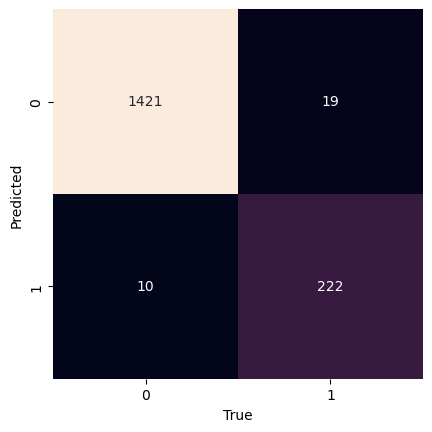

Confusion Matrix for model with spaCy embeddings


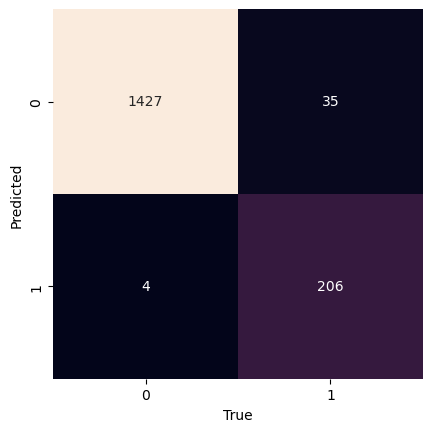

In [20]:
glove_confusion_matrix = metrics.confusion_matrix(y_test, glove_prediction)
spacy_confusion_matrix = metrics.confusion_matrix(y_test, spacy_prediction)
print("Confusion Matrix for model with Glove embeddings")
plot_confusion_matrix(glove_confusion_matrix)
print("Confusion Matrix for model with spaCy embeddings")
plot_confusion_matrix(spacy_confusion_matrix)
    